In [57]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Loading the dataset in dataframe using python
df = pd.read_csv("Absenteeism_at_work.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df.shape

(740, 21)

In [4]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
# Lets check data types
df.dtypes
# we can see all datatypes are numerical.

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [6]:
# Identify the duplicate records
df.duplicated().sum()

34

In [7]:
# Reomove duplicates
df = df.drop_duplicates()

In [8]:
df.isna().sum()
# No null values in the dataset

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
# check for unique data for each column
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [10]:
# List unique items in each columns
columns = list(df.columns)
for i in columns:
    print(i,"   : ", df[i].unique(), "\n")


ID    :  [11 36  3  7 10 20 14  1 24  6 33 18 30  2 19 27 34  5 15 29 28 13 22 17
 31 23 32  9 26 21  8 25 12 16  4 35] 

Reason for absence    :  [26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16] 

Month of absence    :  [ 7  8  9 10 11 12  1  2  3  4  5  6  0] 

Day of the week    :  [3 4 5 6 2] 

Seasons    :  [1 4 2 3] 

Transportation expense    :  [289 118 179 279 361 260 155 235 246 189 248 330 157 291 184 225 369 388
 378 228 300 268 231 233] 

Distance from Residence to Work    :  [36 13 51  5 52 50 12 11 25 29 16 27 42 10 20 31 26 17 22 15 49 48 14 35
 45] 

Service time    :  [13 18 14  3 11 16  4  6 12  7 10  9 17 29  8  1 15 24] 

Age    :  [33 50 38 39 28 36 34 37 41 47 29 48 32 27 43 40 31 30 49 58 46 53] 

Work load Average/day     :  [239.554 205.917 241.476 253.465 306.345 261.306 308.593 302.585 343.253
 326.452 378.884 377.55  275.312 265.615 294.217 265.017 284.031 236.629
 330.061 251.818 244.387 239.409 246.074 253.957 230.29 

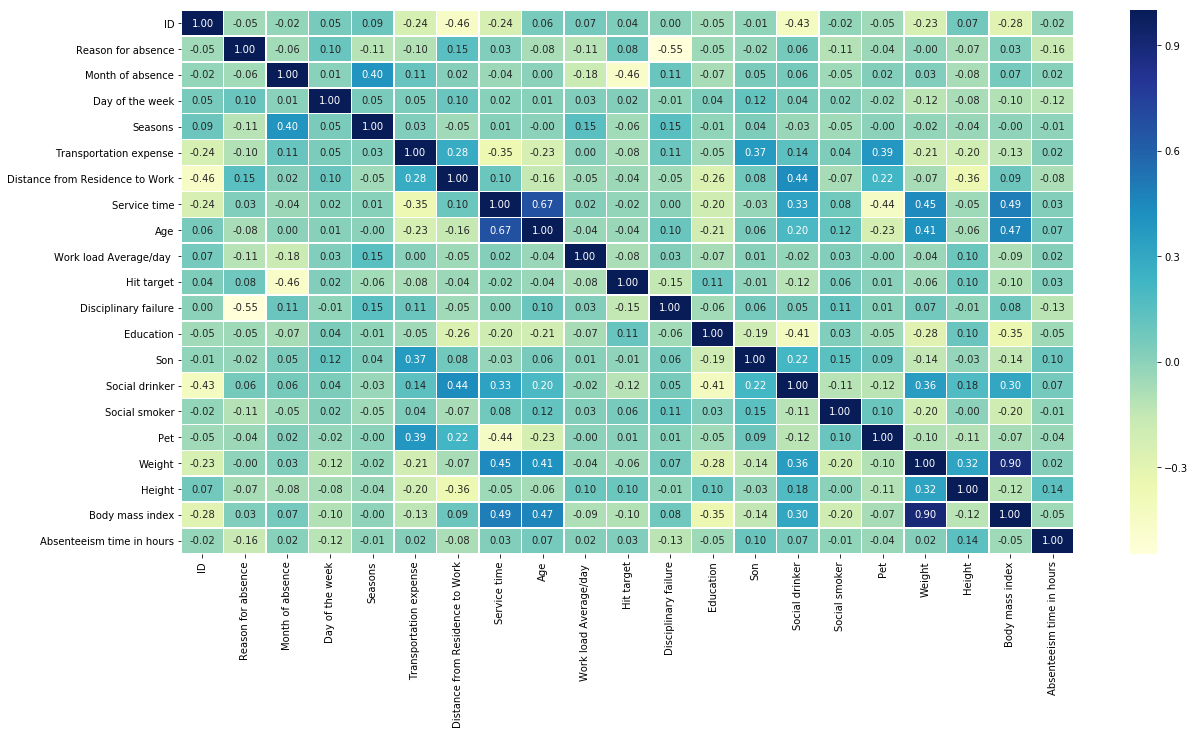

In [11]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [12]:
 # We can remove 'Month of absence', 'Day of the week', 'Seasons', 'Weight', 'Height', 'Hit target' after seeing there correlation weth target. We can also remove ID which is not relevant here
df.drop([ 'ID','Month of absence','Day of the week','Seasons','Weight','Height','Hit target'], 1, inplace = True)

In [13]:
df.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,26,289,36,13,33,239.554,0,1,2,1,0,1,30,4
1,0,118,13,18,50,239.554,1,1,1,1,0,0,31,0
2,23,179,51,18,38,239.554,0,1,0,1,0,0,31,2
3,7,279,5,14,39,239.554,0,1,2,1,1,0,24,4
4,23,289,36,13,33,239.554,0,1,2,1,0,1,30,2


In [14]:
# Lets describe the data
df.describe()
# We can notice that mean and 50% have some significant difference for some of the datas

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.882436,222.977337,29.297450,12.495751,36.478754,272.089984,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,26.635977,7.143059
std,8.482877,67.293426,14.706661,4.370190,6.563404,39.458780,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,4.254901,13.608120
min,0.000000,118.000000,5.000000,1.000000,27.000000,205.917000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,13.000000,179.000000,16.000000,9.000000,31.000000,244.387000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.000000
50%,23.000000,225.000000,26.000000,13.000000,37.000000,264.604000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,3.000000
75%,26.000000,260.000000,49.000000,16.000000,40.000000,294.217000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,31.000000,8.000000
max,28.000000,388.000000,52.000000,29.000000,58.000000,378.884000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,38.000000,120.000000


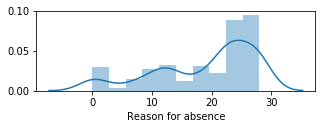

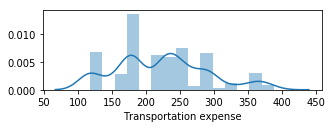

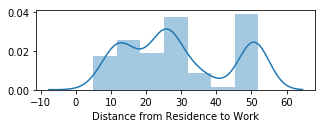

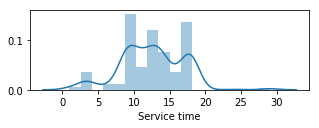

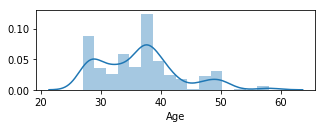

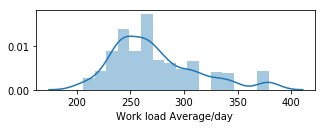

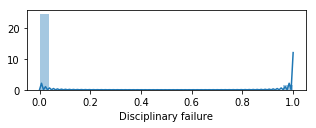

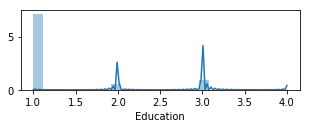

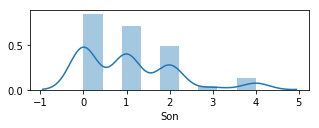

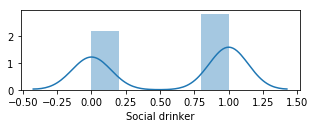

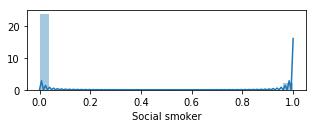

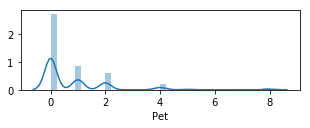

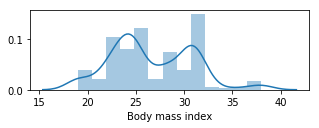

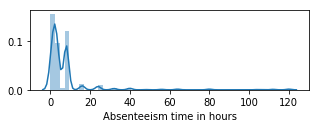

In [15]:
# checking the count plot of variables 
for i in df.columns:
    plt.figure(figsize=(5,5))
    plt.subplot(3,1,3)
    sns.distplot(df[i])
    
# From the below plots we can conclude that the data distributions are not normal

In [16]:
df["Absenteeism time in hours"]

0        4
1        0
2        2
3        4
4        2
5        2
6        8
7        4
8       40
9        8
10       8
11       8
12       8
13       1
14       4
15       8
17       8
18       8
19       2
20       8
21       1
22      40
23       4
24       8
25       7
26       1
27       4
28       8
29       2
30       8
      ... 
710      8
711     24
712      8
713      2
714      0
715      0
716      3
717      2
718      2
719      3
720      3
721      8
722      2
723      3
724      3
725      4
726      2
727      8
728      4
729    120
730     16
731      2
732      8
733      8
734     80
735      8
736      4
737      0
738      0
739      0
Name: Absenteeism time in hours, Length: 706, dtype: int64

In [17]:
# Lets categorize the data and plot for more visual understanding
df_cat_data = df.copy()
df_cat_data['Age Category']             =  ['young employee' if 25<=age<=35 else 'mid age employee' if 36<=age<=45 else 'old employee' if age>=45 else None\
                                             for age in list(df_cat_data['Age'].values)  ] 
df_cat_data['smoke_cat']                = ['no' if period<=0 else 'yes' if period >=1 else None \
                                             for period in list (df_cat_data['Social smoker'].values)]
df_cat_data['Disciplinary cat']         = ['not taken' if period<=0 else 'taken' if period >=1 else None \
                                             for period in list (df_cat_data['Disciplinary failure'].values)]
df_cat_data['drink_cat']                = ['no' if period<=0 else 'yes' if period >=1 else None \
                                             for period in list (df_cat_data['Social drinker'].values)]
df_cat_data['Education_cat']            = ['high school' if  period ==1 else 'grudate' if  period ==2 else "postgraduate" if  period ==3 else 'doctor' if  period ==4 else  None \
                                             for period in list (df_cat_data['Education'].values)]
df_cat_data['transportation category '] = ['cheap' if 100<=tfare<=200 else 'expensive' if 200<=tfare<=300 else 'very expensive' if tfare>300 else None \
                                             for tfare in list(df_cat_data["Transportation expense"].values)]
df_cat_data['distace category']         = ['close' if 0<=tfare<=15 else 'far' if 15<=tfare<=35 else 'very far' if tfare>35 else None \
                                              for tfare in list(df_cat_data["Distance from Residence to Work"].values)]
df_cat_data['absenteeism category']     = ['late' if period<=0 else 'very late' if 0<=period<=10 else 'extremely late' if period>=10 else None \
                                             for period in list (df_cat_data["Absenteeism time in hours"].values)]

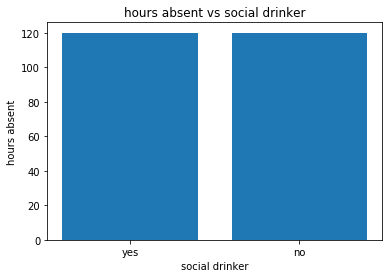

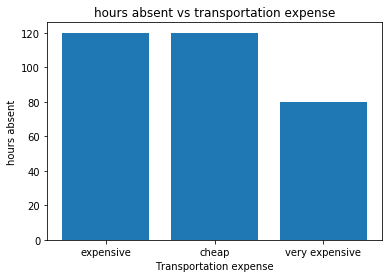

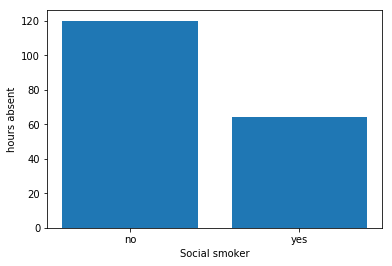

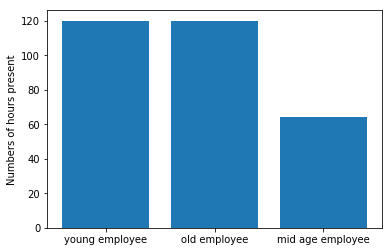

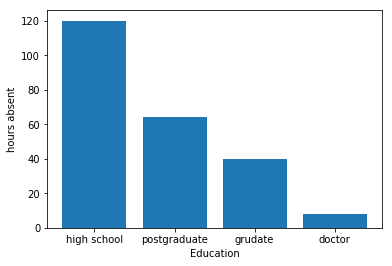

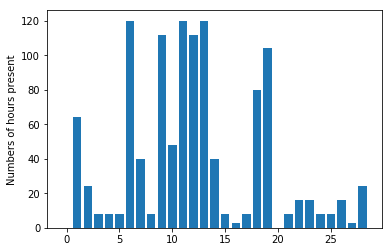

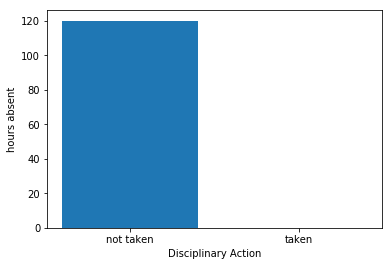

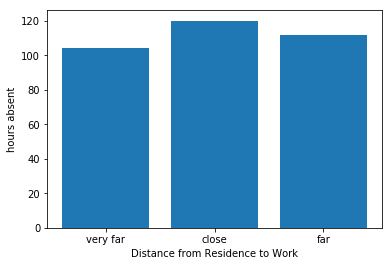

In [18]:
plt.bar(df_cat_data['drink_cat'], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('social drinker')
plt.ylabel("hours absent")
plt.title('hours absent vs social drinker')
plt.show()
plt.bar(df_cat_data['transportation category '], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('Transportation expense')
plt.ylabel("hours absent")
plt.title("hours absent vs transportation expense")
plt.show()
plt.bar(df_cat_data['smoke_cat'], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('Social smoker')
plt.ylabel("hours absent")
plt.show()
plt.bar(df_cat_data['Age Category'], df_cat_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(df_cat_data['Education_cat'], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('Education')
plt.ylabel("hours absent")
plt.show()
plt.bar(df_cat_data['Reason for absence'], df_cat_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(df_cat_data['Disciplinary cat'], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('Disciplinary Action')
plt.ylabel("hours absent")
plt.show()
plt.bar(df_cat_data['distace category'], df_cat_data['Absenteeism time in hours']) 
plt.xlabel('Distance from Residence to Work')
plt.ylabel("hours absent")
plt.show()

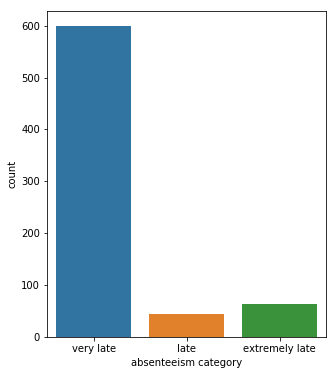

In [19]:
plt.figure(figsize=(5,6))
sns.countplot(x='absenteeism category',data=df_cat_data)

Observations:-
* Transportation expense and distance has high effect on hours of absence
* Employees who faced a disciplinary action never came late
* Smoking contributes a little to absenteeism but social drinking has a great impact on hours of absence
* Young and old employees have more numbers of hours absence than mid aged employees
* Level of education also affects hours of absence

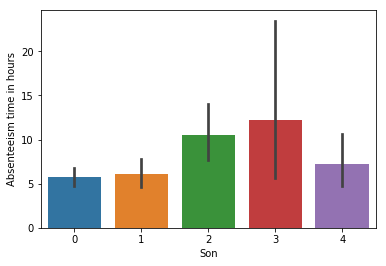

In [20]:
sns.barplot(x=df["Son"],y=df["Absenteeism time in hours"],data=df)
plt.show()
# Employees with children taking more absence

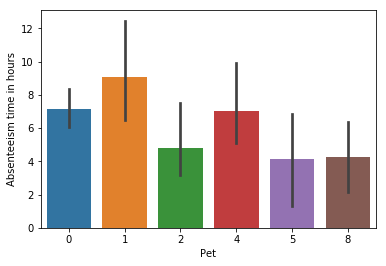

In [21]:
sns.barplot(x=df["Pet"],y=df["Absenteeism time in hours"],data=df)
plt.show()
# Employees with one pet took more absence, but we cannot consider this data because the number of pets increases the result is uneven

In [22]:
df_cat_data.columns

Index(['Reason for absence', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Disciplinary failure', 'Education', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Body mass index',
       'Absenteeism time in hours', 'Age Category', 'smoke_cat',
       'Disciplinary cat', 'drink_cat', 'Education_cat',
       'transportation category ', 'distace category', 'absenteeism category'],
      dtype='object')

In [23]:
df_cat_data.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,...,Body mass index,Absenteeism time in hours,Age Category,smoke_cat,Disciplinary cat,drink_cat,Education_cat,transportation category,distace category,absenteeism category
0,26,289,36,13,33,239.554,0,1,2,1,...,30,4,young employee,no,not taken,yes,high school,expensive,very far,very late
1,0,118,13,18,50,239.554,1,1,1,1,...,31,0,old employee,no,taken,yes,high school,cheap,close,late
2,23,179,51,18,38,239.554,0,1,0,1,...,31,2,mid age employee,no,not taken,yes,high school,cheap,very far,very late
3,7,279,5,14,39,239.554,0,1,2,1,...,24,4,mid age employee,yes,not taken,yes,high school,expensive,close,very late
4,23,289,36,13,33,239.554,0,1,2,1,...,30,2,young employee,no,not taken,yes,high school,expensive,very far,very late


In [24]:
df_cat_data.drop(columns=['Pet', 'Body mass index',
       'Absenteeism time in hours', 'Age Category', 'smoke_cat',
       'Disciplinary cat', 'drink_cat', 'Education_cat',
       'transportation category ', 'distace category'], inplace=True)
df_cat_data.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,absenteeism category
0,26,289,36,13,33,239.554,0,1,2,1,0,very late
1,0,118,13,18,50,239.554,1,1,1,1,0,late
2,23,179,51,18,38,239.554,0,1,0,1,0,very late
3,7,279,5,14,39,239.554,0,1,2,1,1,very late
4,23,289,36,13,33,239.554,0,1,2,1,0,very late


In [25]:
# Check and remove outliers
#from scipy.stats import zscore
#z=np.abs(zscore(df_cat_data))
#print("The datashape before removing outliers: ", df_cat_data.shape)
#df_final = df_cat_data[(z<3).all(axis=1)]
#print("The datashape after removing outliers: ", df_final.shape)

In [26]:
#df_cat_data["absenteeism category"].replace(to_replace='late', value=0, inplace=True)
#df_cat_data["absenteeism category"].replace(to_replace='very late',  value=1, inplace=True)
#df_cat_data["absenteeism category"].replace(to_replace='extremely late',  value=2, inplace=True)


In [27]:
# Lets start modelling
# Split data into X and y
X = df_cat_data.drop("absenteeism category", axis=1)
y = df_cat_data["absenteeism category"]

* We have updated our target from a continuous data to a categorical data, so we will be using Classification model for getting the result. 

In [28]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [29]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=101)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((494, 11), (212, 11), (494,), (212,))

In [31]:
As our target column is imbalanced we will apply an ovesampling technique SMOTE (Synthetic Minority Over-sampling Technique)
#from imblearn.over_sampling import SMOTE
#smote = SMOTE(sampling_strategy='minority',random_state=7)
#X_sm,y_sm = smote.fit_sample(X_train,y_train)

In [32]:
#X_sm.shape,y_sm.shape

In [33]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter = 2000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8820754716981132,
 'KNN': 0.8773584905660378,
 'Random Forest': 0.8679245283018868,
 'SVC': 0.8915094339622641}

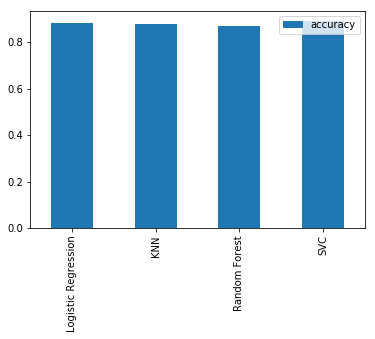

In [35]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [39]:
def max_acc_score(reg, x, y):
    max_acc_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.20)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        acc_score=accuracy_score(y_test, pred)
        if acc_score > max_acc_score:
            max_acc_score = acc_score
            final_r_state = r_state
    print("The max accuracy score for", reg, "is: ", max_acc_score, " achieved at", final_r_state)

In [40]:
rf = RandomForestClassifier()
max_acc_score(rf, X, y)

The max accuracy score for RandomForestClassifier() is:  0.9225352112676056  achieved at 44


In [41]:
lr = LogisticRegression()
max_acc_score(lr, X, y)

The max accuracy score for LogisticRegression() is:  0.9366197183098591  achieved at 56


In [42]:
knn = KNeighborsClassifier()
max_acc_score(knn, X, y)

The max accuracy score for KNeighborsClassifier() is:  0.9366197183098591  achieved at 58


In [43]:
svc = SVC()
max_acc_score(svc, X, y)

The max accuracy score for SVC() is:  0.9366197183098591  achieved at 56


In [44]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [45]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(random_state=56),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=56),
                   n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [47]:
rs_log_reg.score(X_test, y_test)

0.8915094339622641

#### LogisticRegression

In [48]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.615848211066026,
                         solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [49]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.9084507 , 0.90780142, 0.91489362, 0.90780142, 0.88652482])

In [50]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9050943961642194

In [52]:
# Make predictions with tuned model
y_preds = clf.predict(X_test)

In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[  0   0  22]
 [  0  11   1]
 [  0   0 178]]


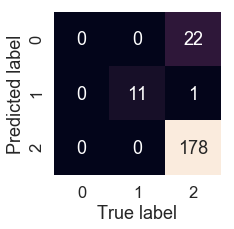

In [54]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                    fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [55]:
print(classification_report(y_test, y_preds))

                precision    recall  f1-score   support

extremely late       0.00      0.00      0.00        22
          late       1.00      0.92      0.96        12
     very late       0.89      1.00      0.94       178

      accuracy                           0.89       212
     macro avg       0.63      0.64      0.63       212
  weighted avg       0.80      0.89      0.84       212



In [58]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds))

Accuracy:  0.8915094339622641


### SVC

In [ ]:
svc = SVC(random_state=56)

In [59]:
svc.fit(X_train,y_train)

SVC()

In [60]:
pred = svc.predict(X_test)

In [64]:
# Confusion matrix
print(confusion_matrix(y_test, pred))

[[  0   0  22]
 [  0  11   1]
 [  0   0 178]]


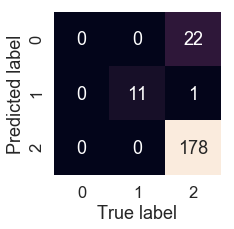

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                    fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

In [61]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

extremely late       0.00      0.00      0.00        22
          late       1.00      0.92      0.96        12
     very late       0.89      1.00      0.94       178

      accuracy                           0.89       212
     macro avg       0.63      0.64      0.63       212
  weighted avg       0.80      0.89      0.84       212



In [62]:
print("Accuracy: ", metrics.accuracy_score(y_test, pred))

Accuracy:  0.8915094339622641


#### We are getting similar scores for LiLogisticRegression and SVC